In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image

In [ ]:
pip install colorama

In [4]:
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [5]:
from google.colab import files
uploaded = files.upload()

Saving MoviesOnStreamingPlatforms_updated.csv to MoviesOnStreamingPlatforms_updated.csv
Saving tv_shows.csv to tv_shows.csv


In [ ]:
### Custom Colors ###

In [6]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

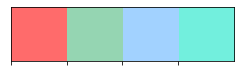

In [7]:
sns.palplot(sns.color_palette(custom_colors),size=1)

In [ ]:
# Netflix

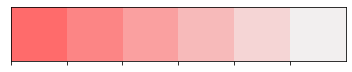

In [8]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

In [ ]:
# Hulu

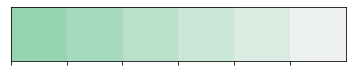

In [9]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

In [ ]:
# Amazon_Prime_Video

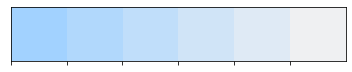

In [10]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

In [ ]:
# Disney+

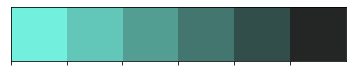

In [11]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

In [12]:
df_movie = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df_tv = pd.read_csv('tv_shows.csv')

In [13]:
df_movie.head(3)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0


In [14]:
df_tv.head(3)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1


In [15]:
df_movie = df_movie.drop(['Unnamed: 0','ID'], axis = 1) 

In [16]:
df_tv = df_tv.drop(['Unnamed: 0', 'ID'], axis = 1)

In [17]:
df_movie.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0


In [18]:
df_tv.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1


In [19]:
len(df_movie['Directors'].unique())

6618

In [20]:
len(df_movie['Genres'].unique())

1419

In [21]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [ ]:
m_genres = splitting(df_movie,'Genres')
m_lang = splitting(df_movie,'Language')

In [ ]:
### 플랫폼 별 TV Series & 영화 ###

In [23]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [24]:
val_counts = []
dfs = [df_movie,df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [25]:
val_counts

[3695, 1047, 4113, 922, 1971, 1621, 1831, 351]

In [26]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

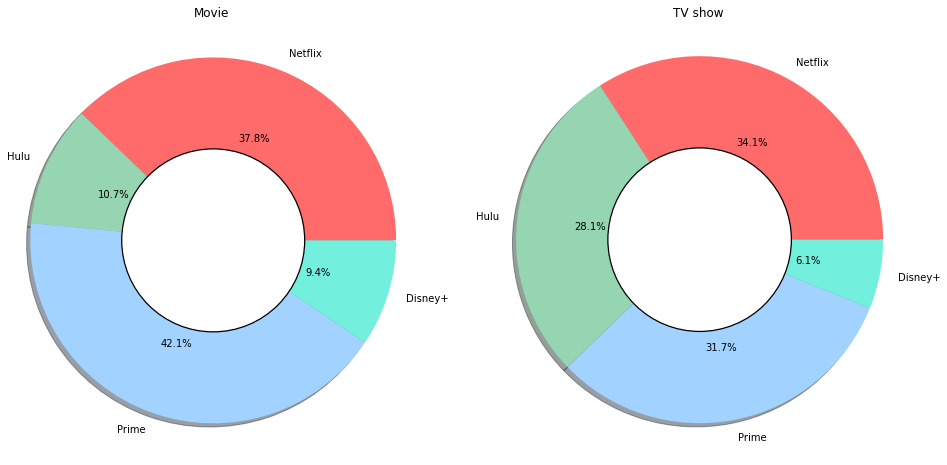

In [27]:
fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = custom_colors
explode = (0, 0, 0, 0) 

donut(121,df_movie,sizes1,'Movie')
donut(122,df_tv,sizes2,'TV show')
plt.show()

## Movie
Amazon Prime Video > Netflix > Hulu > Disney+


### TV Show
Netflix > Amazon Prime Video > Hulu > Disney+

In [28]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode = "number",
    value = 4113,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movie<br><span style='font-size:0.8em;color:gray'>On Prime Video</span>"},
    domain = {'x': [0, 0.5], 'y': [0.6, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = 1971,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Show<br><span style='font-size:0.8em;color:gray'>On Netflix</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}))

fig.show()

In [29]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   object 
 4   Rotten Tomatoes  9508 non-null   object 
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Type             9515 non-null   int64  
 10  Directors        9104 non-null   object 
 11  Genres           9399 non-null   object 
 12  Country          9261 non-null   object 
 13  Language         9202 non-null   object 
 14  Runtime          9196 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 1.1+ MB


In [30]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            5368 non-null   object
 1   Year             5368 non-null   int64 
 2   Age              3241 non-null   object
 3   IMDb             4406 non-null   object
 4   Rotten Tomatoes  5368 non-null   object
 5   Netflix          5368 non-null   int64 
 6   Hulu             5368 non-null   int64 
 7   Prime Video      5368 non-null   int64 
 8   Disney+          5368 non-null   int64 
 9   Type             5368 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 419.5+ KB


In [31]:
df_movie['IMDb'] = df_movie['IMDb'].str.split('/').str[0]
df_movie['Rotten Tomatoes'] = df_movie['Rotten Tomatoes'].str.split('/').str[0]
df_tv['IMDb'] = df_tv['IMDb'].str.split('/').str[0]
df_tv['Rotten Tomatoes'] = df_tv['Rotten Tomatoes'].str.split('/').str[0]

In [32]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [33]:
sunburst(df_movie,'Netflix','amp')

In [35]:
sunburst(df_movie,'Hulu','Blugrn')

In [36]:
sunburst(df_movie,'Prime Video','haline')

In [37]:
sunburst(df_movie,'Disney+','dense')

In [ ]:
### 영화 런타임 및 개봉 연도 분포 그래프 ###

In [38]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


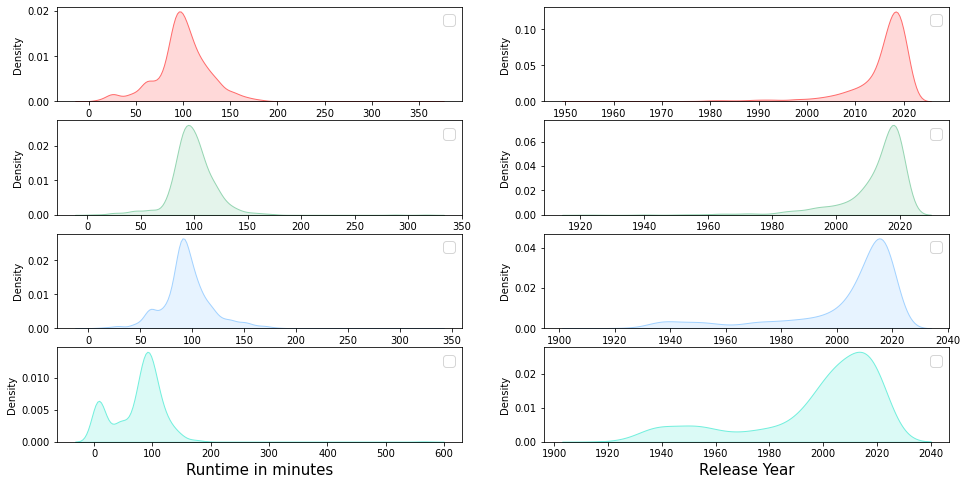

In [40]:
plt.figure(figsize = (16, 8))

kde(421,df_movie,'Netflix',0)
kde(423,df_movie,'Hulu',1)
kde(425,df_movie,'Prime Video',2)
kde(427,df_movie,'Disney+',3)

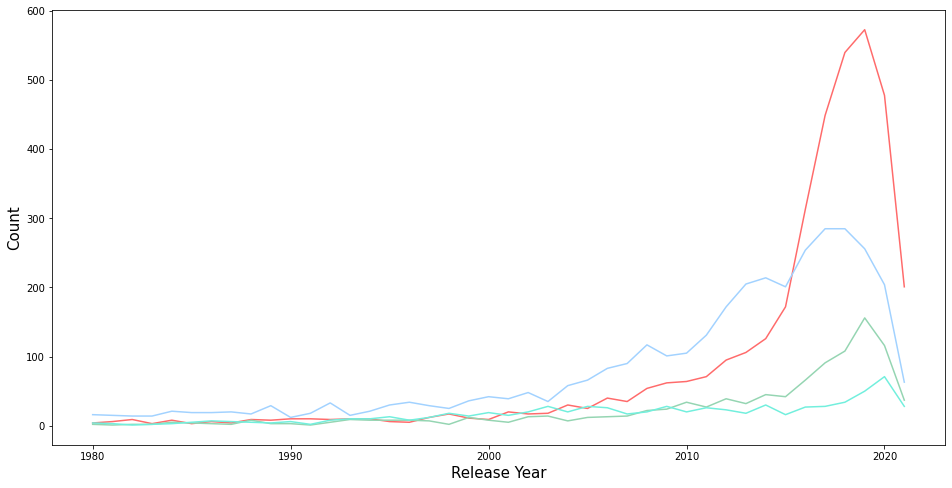

In [42]:
post_1980 = df_movie[df_movie.Year >= 1980]
year_movie = post_1980.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movie.index,y=year_movie['Netflix'])
sns.lineplot(x=year_movie.index,y=year_movie['Hulu'])
sns.lineplot(x=year_movie.index,y=year_movie['Prime Video'])
sns.lineplot(x=year_movie.index,y=year_movie['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

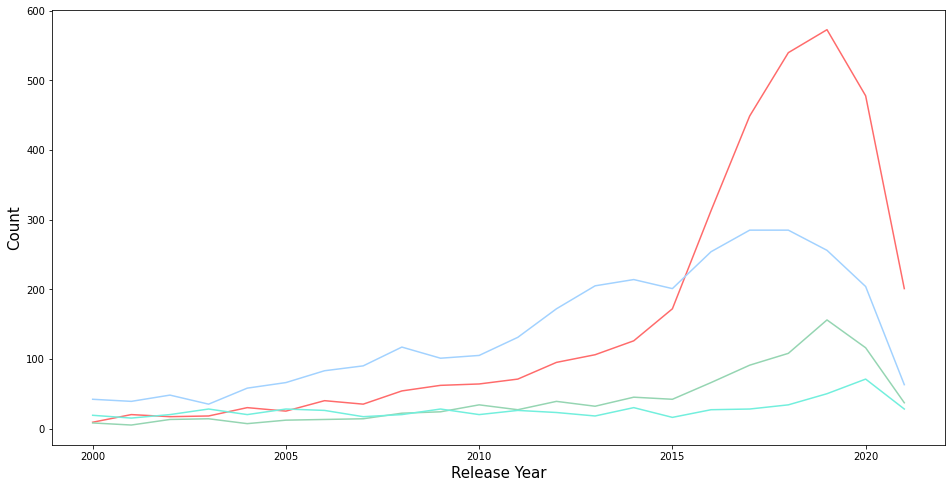

In [43]:
post_2000 = df_movie[df_movie.Year >= 2000]
year_movie = post_2000.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movie.index,y=year_movie['Netflix'])
sns.lineplot(x=year_movie.index,y=year_movie['Hulu'])
sns.lineplot(x=year_movie.index,y=year_movie['Prime Video'])
sns.lineplot(x=year_movie.index,y=year_movie['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

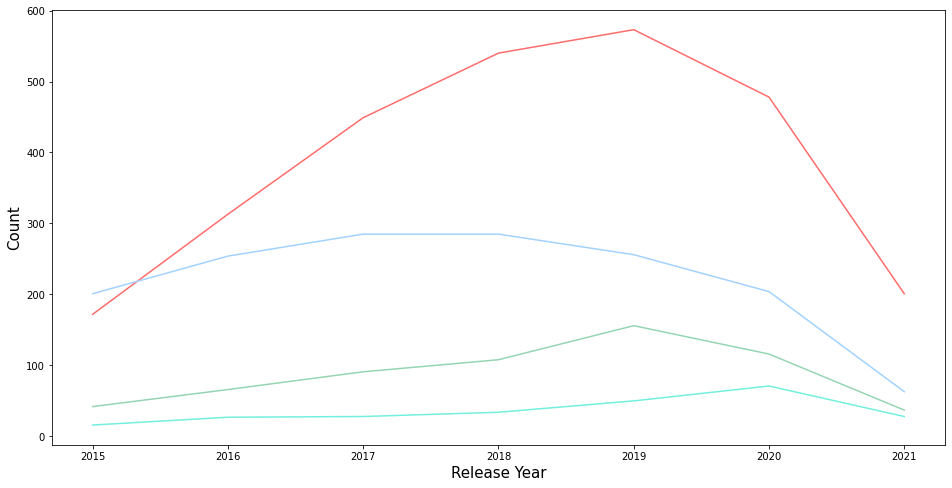

In [44]:
post_2015 = df_movie[df_movie.Year >= 2015]
year_movie = post_2015.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movie.index,y=year_movie['Netflix'])
sns.lineplot(x=year_movie.index,y=year_movie['Hulu'])
sns.lineplot(x=year_movie.index,y=year_movie['Prime Video'])
sns.lineplot(x=year_movie.index,y=year_movie['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [ ]:
### Age별 TV Show 분포 그래프 ###

In [45]:
df_t = df_tv.copy()
df_t = df_t[df_t['Age'].notna()]

In [ ]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

In [47]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

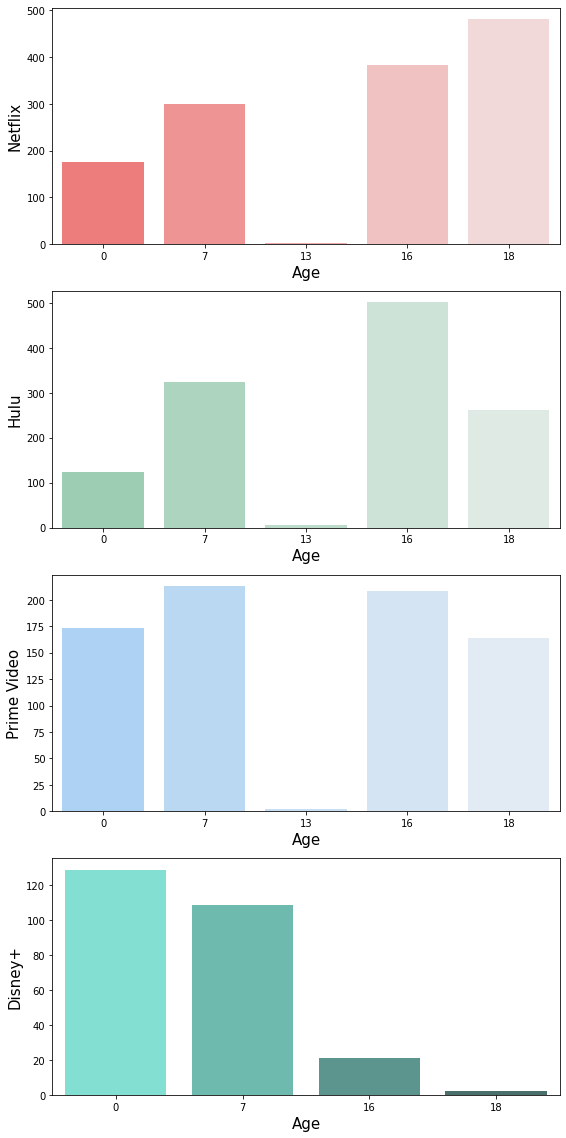

In [48]:
plt.figure(figsize = (20, 20))

barplot(421,df_t,'Netflix',netflix_p)
barplot(423,df_t,'Hulu',hulu_p)
barplot(425,df_t,'Prime Video',prime_p)
barplot(427,df_t,'Disney+',disney_p)

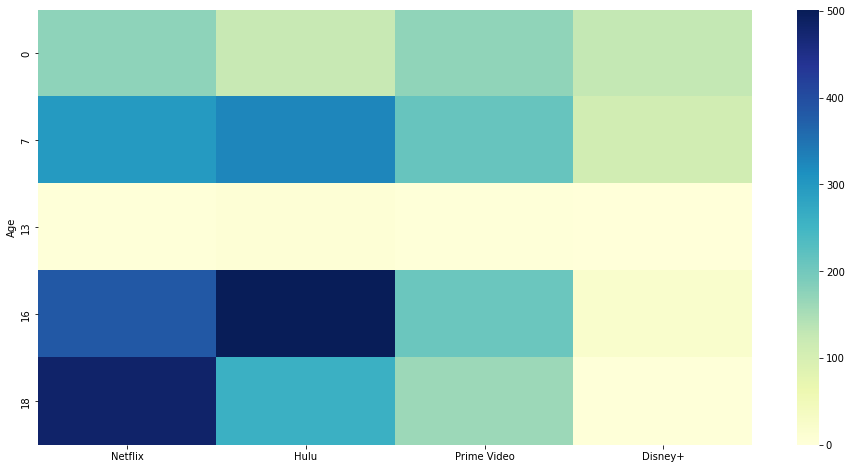

In [49]:
plt.figure(figsize = (16, 8))
tv_age = df_t.groupby('Age')[['Netflix','Hulu','Prime Video','Disney+']].sum()
sns.heatmap(tv_age,cmap="YlGnBu")
plt.show()

In [ ]:
### IMDb 평점과 어떤 플랫폼에서 보유하고 있는지 ###

In [50]:
r = df_tv.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']]
r['IMDb'] = r['IMDb'].astype(float)

In [51]:
r.style.bar(subset=["Netflix"], color='#ff6b6b')\
.bar(subset=["Hulu"], color='#95d5b2')\
.bar(subset=["Prime Video"], color='#a2d2ff')\
.bar(subset=["Disney+"], color='#72efdd')\
.bar(subset=["IMDb"], color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime Video,Disney+
3802,The Secret World of Nature: Spain,9.600000,0,0,1,0
5077,Bluey,9.600000,0,0,0,1
3611,Malgudi Days,9.500000,0,0,1,0
0,Breaking Bad,9.400000,1,0,0,0
5277,Alaska Animal Rescue,9.400000,0,0,0,1
80,Our Planet,9.300000,1,0,0,0
3115,Hungry Henry,9.300000,0,1,0,0
3760,Everyday Driver,9.300000,0,0,1,0
2009,Cosmos,9.300000,0,1,1,1
5,Avatar: The Last Airbender,9.300000,1,0,1,0


In [52]:
r1 = df_movie.sort_values(by='IMDb', ascending=False)
r1 = r1[0:10]
r1['Movie']='Movie'
fig = px.treemap(r1, path=['Movie','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='Purp')
fig.show()

In [53]:
### Rotten Tomatoes 기준 ###

In [54]:
df_m = df_movie.copy()
df_m = df_m.dropna()

In [55]:
df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].str.replace('%','')
df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].astype(str).astype(int)
df_m['Directors']=df_m['Directors'].astype('str')

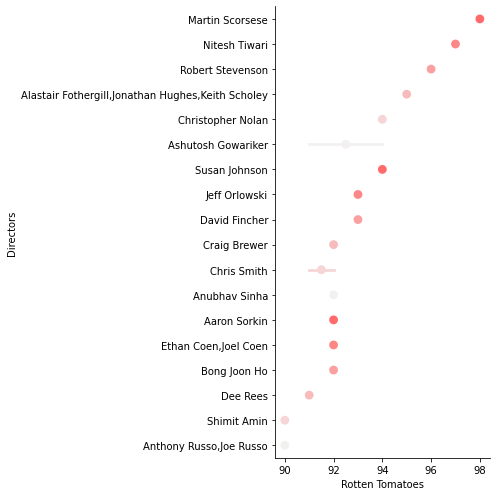

In [56]:
df_m=df_m.sort_values(by='Rotten Tomatoes', ascending=False)
rating = df_m[0:20]
sns.catplot(x="Rotten Tomatoes", y="Directors",data=rating, palette=netflix_p,height=7,kind="point");

In [58]:
### 모든 데이터 기반 ###

In [59]:
def dist(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.distplot(dataframe['IMDb'], color=custom_colors[c],vertical=True)
    
    plt.ylabel('IMDb rating, '+platform, fontsize = 15)
    plt.subplot(i+1)
    sns.distplot(dataframe['Rotten Tomatoes'], color=custom_colors[c],vertical=True)
    plt.ylabel('Rotten Tomatoes, '+platform, fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a futu

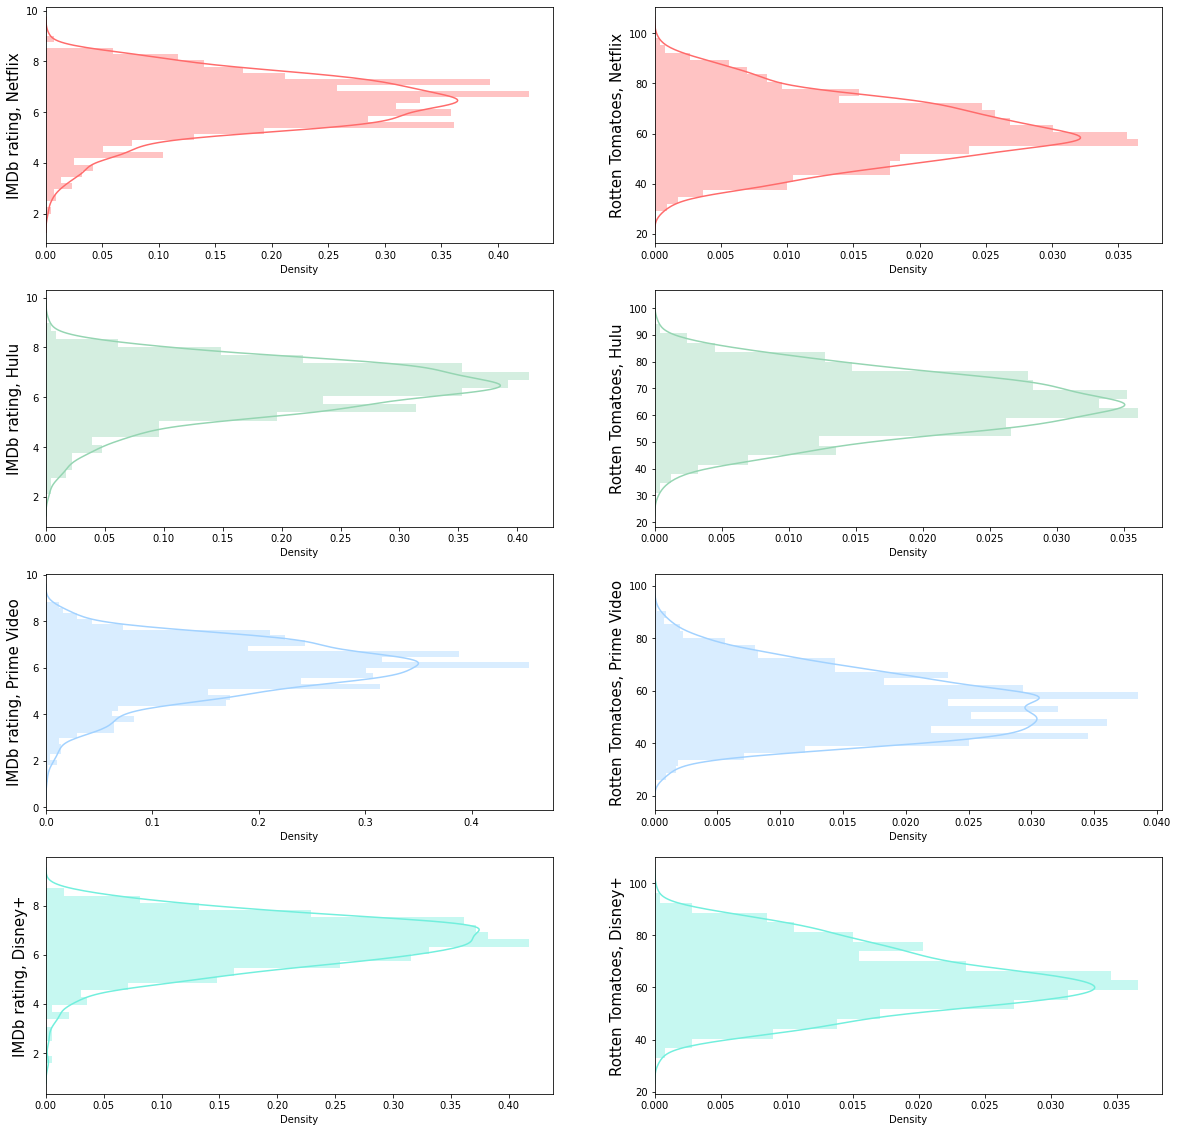

In [60]:
plt.figure(figsize = (20, 20))

dist(421,df_m,'Netflix',0)
dist(423,df_m,'Hulu',1)
dist(425,df_m,'Prime Video',2)
dist(427,df_m,'Disney+',3)

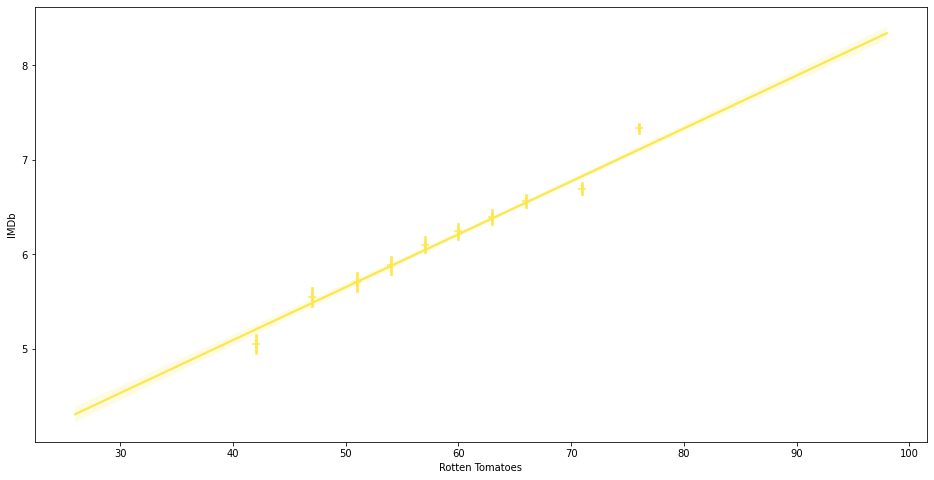

In [61]:
df_m['Rotten Tomatoes'] = df_m['Rotten Tomatoes'].astype(float)
df_m['IMDb'] = df_m['IMDb'].astype(float)

plt.figure(figsize = (16, 8))
sns.regplot(x = df_m['Rotten Tomatoes'],y = df_m['IMDb'],x_bins=10,marker="+",color="#FDE74C")
plt.show()

In [ ]:
### All Platform 언어 및 장르 그래프 ###

In [63]:
df_l_merged = pd.concat([df_movie, m_lang], axis = 1, sort = False)
df_g_merged = pd.concat([df_movie, m_genres], axis = 1, sort = False)

In [64]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

In [65]:
bar(df_l_merged,'Netflix','#ff6b6b')

,Number of movies
English,2266
Hindi,380
Spanish,377
French,223
Arabic,133
German,117
Japanese,111
Italian,85
Mandarin,83
Tamil,70


In [68]:
bar(df_g_merged,'Netflix','#ff6b6b')

,Number of movies
Drama,1679
Comedy,1473
Thriller,709
Romance,638
Action,614
Documentary,452
Crime,448
Adventure,362
Family,357
Mystery,273


In [67]:
bar(df_l_merged,'Hulu','#95d5b2')

,Number of movies
English,956
Spanish,74
French,71
German,48
Japanese,35
Italian,32
Russian,30
Korean,22
Mandarin,21
Swedish,15


In [69]:
bar(df_g_merged,'Hulu','#95d5b2')

,Number of movies
Drama,509
Comedy,330
Thriller,275
Romance,189
Action,186
Horror,159
Documentary,145
Adventure,140
Crime,130
Sci-Fi,116


In [70]:
bar(df_l_merged,'Prime Video','#a2d2ff')

,Number of movies
English,3437
Spanish,195
French,184
Hindi,181
German,118
Italian,99
Russian,64
Telugu,59
Mandarin,58
Tamil,53


In [71]:
bar(df_g_merged,'Prime Video','#a2d2ff')

,Number of movies
Drama,1917
Comedy,1251
Thriller,943
Romance,753
Action,712
Crime,554
Horror,462
Documentary,454
Adventure,388
Mystery,347


In [72]:
bar(df_l_merged,'Disney+','#72efdd')

,Number of movies
English,866
French,43
Spanish,34
German,27
Italian,15
Japanese,12
Mandarin,12
None,10
Norwegian,8
Arabic,7


In [73]:
bar(df_g_merged,'Disney+','#72efdd')

,Number of movies
Family,645
Comedy,471
Adventure,356
Animation,328
Fantasy,264
Drama,221
Short,180
Documentary,130
Action,125
Sci-Fi,121


In [ ]:
### ML ###

In [77]:
pd.set_option('display.float_format', '{:,.1f}'.format)sns.displot(df['SalePrice'], kde=True)

In [83]:
df_movie['IMDb'] = df_movie['IMDb'].apply(str)

In [78]:
df_movie['IMDb'].describe()

count     9309
unique      81
top        6.5
freq       373
Name: IMDb, dtype: object

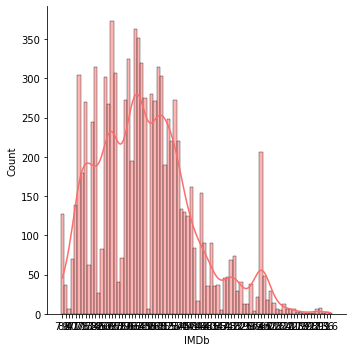

In [84]:
sns.displot(df_movie['IMDb'], kde=True)

In [85]:
predict = df_movie['IMDb'].mean()

TypeError: ignored